In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle -v

Kaggle API 1.5.4


In [ ]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

 94% 173M/185M [00:01<00:00, 83.2MB/s]
100% 185M/185M [00:02<00:00, 95.8MB/s]


In [ ]:
!unzip az-handwritten-alphabets-in-csv-format.zip

Archive:  az-handwritten-alphabets-in-csv-format.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


In [ ]:
!ls

 az-handwritten-alphabets-in-csv-format.zip   kaggle.json
'A_Z Handwritten Data'			      sample_data
'A_Z Handwritten Data.csv'


In [1]:
import pandas as pd
df = pd.read_csv("A_Z Handwritten Data.csv")
df.head(5)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#x = df.drop('0',axis = 1)
#y = df['0']
X = df.iloc[:,1:].values
y = df.iloc[:,0]

In [3]:
y.shape

(372450,)

In [4]:
import numpy as np
X_images = np.zeros((df.shape[0],28,28,1))
 
for i,j in enumerate(X):
  img = np.array(j).reshape(28,28,1)
  img = img / 255
  X_images[i] = img



In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_images, y, test_size = 0.2)
x_train.shape,x_test.shape


((297960, 28, 28, 1), (74490, 28, 28, 1))

In [6]:
y_train.shape,y_test.shape

((297960,), (74490,))

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [8]:
CNN_model = Sequential()
CNN_model.add(Conv2D(16,(3,3),activation='relu',padding= 'same',input_shape=(28,28,1)))
CNN_model.add(MaxPool2D(pool_size=(2,2)))
CNN_model.add(Conv2D(32,(3,3),activation='relu',padding= 'same'))
CNN_model.add(MaxPool2D(pool_size=(2,2)))
CNN_model.add(Conv2D(64,(3,3),activation='relu',padding= 'same'))
CNN_model.add(MaxPool2D(pool_size=(2,2)))
CNN_model.add(Flatten())
CNN_model.add(Dense(50,activation='relu'))
CNN_model.add(Dense(50,activation='relu'))
CNN_model.add(Dense(26,activation='softmax'))

In [9]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [10]:
CNN_model.compile(optimizer='adam',metrics='accuracy',loss='sparse_categorical_crossentropy')

In [ ]:
CNN_model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/5
9312/9312 [==============================] - 147s 16ms/step - loss: 0.1789 - accuracy: 0.9486 - val_loss: 0.0690 - val_accuracy: 0.9806
Epoch 2/5
9312/9312 [==============================] - 152s 16ms/step - loss: 0.0648 - accuracy: 0.9817 - val_loss: 0.0578 - val_accuracy: 0.9836
Epoch 3/5
9312/9312 [==============================] - 276s 30ms/step - loss: 0.0502 - accuracy: 0.9856 - val_loss: 0.0480 - val_accuracy: 0.9868
Epoch 4/5
9312/9312 [==============================] - 285s 31ms/step - loss: 0.0427 - accuracy: 0.9877 - val_loss: 0.0503 - val_accuracy: 0.9858
Epoch 5/5
8929/9312 [===========================>..] - ETA: 6s - loss: 0.0369 - accuracy: 0.9892

In [ ]:
x_test[0].shape

(28, 28, 1)

In [ ]:
pred=CNN_model.predict(x_test[0].reshape(1,28,28,1))

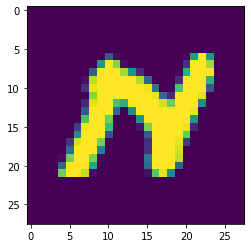

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0].reshape(28,28))

In [ ]:
chr(np.argmax(pred)+65)

'N'

In [ ]:
ord('N')

78

In [ ]:
CNN_model.save('model.h5')